In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
plt.rcParams["font.family"] = "STXIHEI"

import statsmodels.api as sm

In [2]:
from sklearn import datasets

boston = datasets.load_boston()

In [3]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
bostondf = pd.DataFrame(boston.data,columns = boston.feature_names)
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
from sklearn import preprocessing

std = preprocessing.StandardScaler()
std

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
std.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [8]:
std.fit(boston.data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
std.mean_

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

In [10]:
std.var_

array([7.38403597e+01, 5.42861840e+02, 4.69714297e+01, 6.43854770e-02,
       1.34010989e-02, 4.92695216e-01, 7.90792473e+02, 4.42525226e+00,
       7.56665313e+01, 2.83486236e+04, 4.67772630e+00, 8.31828042e+03,
       5.08939794e+01])

In [11]:
ZX = std.transform(boston.data)
ZX[:2]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937]])

In [12]:
std.fit_transform(boston.data)[:2]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937]])

In [13]:
reg.fit(boston.data,boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
reg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [15]:
pred = reg.predict(boston.data)
pred[:10]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

In [16]:
reg.score(boston.data,boston.target)

0.7406426641094094

In [17]:
std.mean_,std.scale_

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]),
 array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
        1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
        8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
        7.13400164e+00]))

In [18]:
reg.intercept_,reg.coef_

(36.45948838509001,
 array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]))

In [19]:
preprocessing.scale(boston.data)[:2]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937]])

In [20]:
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
 bostondf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [22]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(bostondf)
X_scaled[:2]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937]])

In [23]:
X_scaled.mean(axis = 0),X_scaled.std(axis = 0)

(array([-8.78743718e-17, -6.34319123e-16, -2.68291099e-15,  4.70199198e-16,
         2.49032240e-15, -1.14523016e-14, -1.40785495e-15,  9.21090169e-16,
         5.44140929e-16, -8.86861950e-16, -9.20563581e-15,  8.16310129e-15,
        -3.37016317e-16]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [24]:
# 对整个矩阵坐标化
X_scaled1 = preprocessing.scale(bostondf,axis = 0)
X_scaled1[:2]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937]])

In [25]:
preprocessing.scale(boston.target)[:10]

array([ 0.15968566, -0.10152429,  1.32424667,  1.18275795,  1.48750288,
        0.6712218 ,  0.03996443,  0.49708184, -0.65659542, -0.39538548])

In [26]:
std = preprocessing.StandardScaler()
std.fit(bostondf)
std.mean_,std.scale_

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]),
 array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
        1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
        8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
        7.13400164e+00]))

In [27]:
std.transform(bostondf[:2])

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937]])

In [28]:
rscaler = preprocessing.RobustScaler()
rs = rscaler.fit_transform(bostondf)
rs[:2]

array([[-0.06959315,  1.44      , -0.57164988,  0.        ,  0.        ,
         0.49661247, -0.25076453,  0.28577673, -0.2       , -0.0878553 ,
        -1.33928571,  0.26190191, -0.63768116],
       [-0.06375455,  0.        , -0.20294345,  0.        , -0.39428571,
         0.28794038,  0.0285423 ,  0.56978872, -0.15      , -0.22739018,
        -0.44642857,  0.26190191, -0.22188906]])

In [30]:
np.median(rs,axis = 0), rs.mean(axis = 0),rs.std(axis = 0)

(array([-7.69783542e-18,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.19910243e-17,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         8.86877377e-17]),
 array([ 0.93379097,  0.90909091,  0.11206651,  0.06916996,  0.09540034,
         0.10316313, -0.1819592 ,  0.1902672 ,  0.22747036,  0.20216319,
        -0.21230943, -1.66763249,  0.1292417 ]),
 array([2.39025083, 1.86395166, 0.53087301, 0.25374293, 0.66150352,
        0.95111452, 0.57331361, 0.68117165, 0.43493256, 0.43506588,
        0.77243043, 4.37484626, 0.71304364]))

d:\python37\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


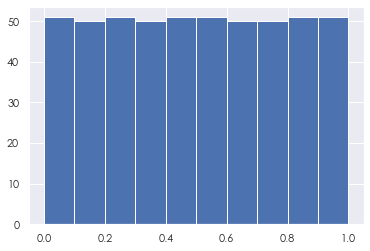

In [35]:
QT = preprocessing.QuantileTransformer()
qtres = QT.fit_transform(bostondf)
pd.DataFrame(qtres)[0].hist()

In [36]:
# threshold 阈值 <= 为0 > 为1
preprocessing.binarize(bostondf,threshold = 2.5)[:2]

array([[0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
       [0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.]])

In [39]:
enc = preprocessing.OneHotEncoder()
# 第一列 0，1 两个类别
# 必须是数值型
enc.fit([
    [0,0,3],
    [1,1,0],
    [0,2,1],
    [1,0,2]
])
enc.transform([[0,1,3]]).toarray()

d:\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 1., 0., 0., 0., 0., 1.]])

In [41]:
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [40]:
bostondf.RAD.value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [42]:
bostondf.RAD.astype("int").astype("str").value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

In [43]:
pd.get_dummies(bostondf.RAD.astype("int").astype("str"),prefix = "RAD").head()

,RAD_1,RAD_2,RAD_24,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [45]:
from sklearn.preprocessing import Imputer

imp = Imputer()
imp.fit([
    [1,2],
    [np.nan,3],
    [7,6]
])
imp.transform([
    [np.nan,2],
    [6,np.nan]
])

d:\python37\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[4.        , 2.        ],
       [6.        , 3.66666667]])

In [46]:
imp.statistics_

array([4.        , 3.66666667])

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3,interaction_only = True)
polyres = poly.fit_transform(bostondf.iloc[:,[0,1,2,3]])

In [48]:
# 各列 cons 0 1 2 3 01 02 03 12 13 ....
polyres[:1]

array([[1.000000e+00, 6.320000e-03, 1.800000e+01, 2.310000e+00,
        0.000000e+00, 1.137600e-01, 1.459920e-02, 0.000000e+00,
        4.158000e+01, 0.000000e+00, 0.000000e+00, 2.627856e-01,
        0.000000e+00, 0.000000e+00, 0.000000e+00]])

In [49]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
# log(1+X)
transformer = FunctionTransformer(np.log1p)
X = np.array([
    [0,1],
    [2,3]
])
transformer.transform(X)

d:\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])